# **Fashion MNIST**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models

Prepare the data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# check the shape of the data
print('Number of images in the training dataset:', x_train.shape[0])
print('Number of images in the testing dataset:', x_test.shape[0])
print(f"Shape of the images in the training dataset: {x_train[0].shape}")

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Shape of the images in the training dataset: (28, 28)


Visualize the data (using matplotlib)

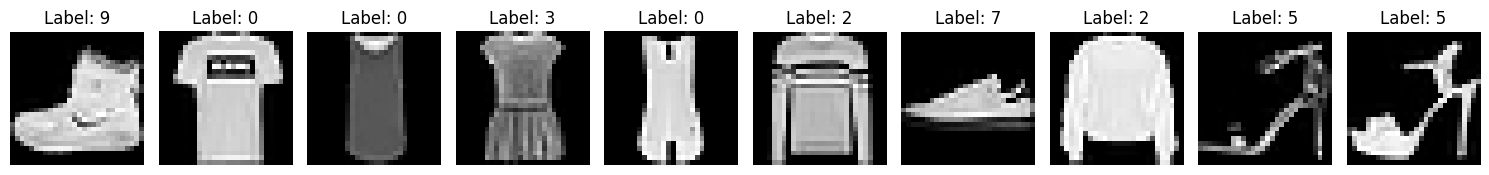

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Prepare the model

In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### **Train**

In [7]:
model.fit(
    x_train, y_train,
    epochs=16,
    batch_size=32,
)

Epoch 1/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7759 - loss: 0.6424
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3764
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8766 - loss: 0.3311
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3110
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8913 - loss: 0.2912
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8970 - loss: 0.2791
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8998 - loss: 0.2690
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9048 - loss: 0.2554
Epoch 9/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.2428
Epoch 10/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9106 - loss: 0.2392
Epoch 11/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.2282
Epoch 12/16
1875/1875 ━━━━━━━━

### **Evaluate**


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.3554
Test accuracy: 88.50%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


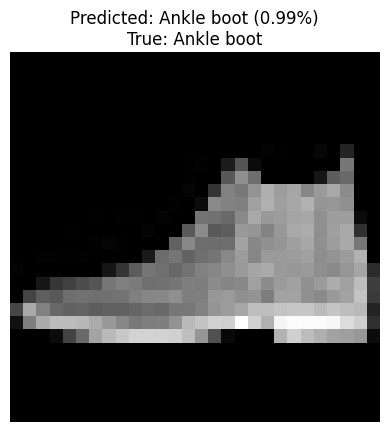

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)
pred = predictions[0]
predicted_index = np.argmax(pred)
confidence_score = pred[predicted_index] * 100

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_index]} "
          f"({confidence_score:.2f}%)\nTrue: {class_names[y_test[0]]}")
plt.axis('off')
plt.show()


### **Using CNN**

In [21]:
cnn = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

try early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

In [23]:
cnn.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=16, 
    batch_size=32,
    callbacks=callbacks)

Epoch 1/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7393 - loss: 0.7144 - val_accuracy: 0.8680 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 2/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8684 - loss: 0.3634 - val_accuracy: 0.8843 - val_loss: 0.2996 - learning_rate: 0.0010
Epoch 3/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8831 - loss: 0.3139 - val_accuracy: 0.8895 - val_loss: 0.2921 - learning_rate: 0.0010
Epoch 4/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8980 - loss: 0.2796 - val_accuracy: 0.8968 - val_loss: 0.2707 - learning_rate: 0.0010
Epoch 5/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9055 - loss: 0.2577 - val_accuracy: 0.9063 - val_loss: 0.2571 - learning_rate: 0.0010
Epoch 6/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9125 - loss: 0.2327 - val_accuracy: 0.9018 - val_loss: 0.2584 - learning_rate: 0.0010
Epoch 7/16
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9

In [24]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9116 - loss: 0.2630
Test accuracy: 91.47%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


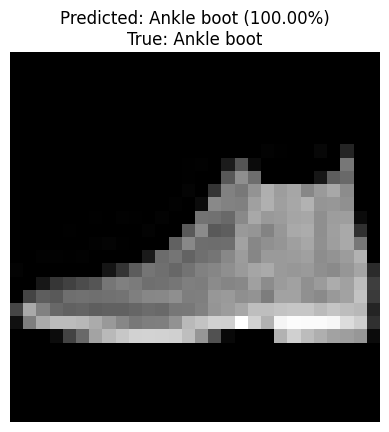

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = cnn.predict(x_test)
pred = predictions[0]
predicted_index = np.argmax(pred)
confidence_score = pred[predicted_index] * 100

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_index]} "
          f"({confidence_score:.2f}%)\nTrue: {class_names[y_test[0]]}")
plt.axis('off')
plt.show()
